# Lecture 8
- Central limit theorem

In [18]:

import numpy as np
import numpy.random as npr
import random
import itertools

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

import scipy.stats as stats

In [19]:
# For the simple motivating example
import matplotlib.ticker as ticker  # Import ticker for formatting


In [34]:
E = stats.expon(scale= 4)
E.mean()

4.0

# First, can we use simulation to solve this question?
A machine process parts, one at a time, in a time independently and uniformly distributed in [1,5]. 
What is the probability the machine processes at least 100 parts in 320 time units? 

In [20]:
n=100 # the total number of parts.

# define the random variable for the time needed for processing one part.
X = stats.uniform(loc =1, scale = 4)
mu = X.mean()
sigma = X.std()# standard deviation, recall variance = sigma**2
mu, sigma

(3.0, 1.1547005383792515)

In [21]:
# todo implement a simulation to compute the probability
num_sims = 10_000 
count=0
for i in range(num_sims):
    Xseq = X.rvs(size = n)
    if np.sum(Xseq) <= 320: 
        count += 1
print("The relative frequency of processing at least 100 parts in 320 time unit", count/num_sims)

The relative frequency of processing at least 100 parts in 320 time unit 0.9589


In [22]:
def getSn(n): 
    num_sims = 10_000
    Sn = np.zeros(num_sims)
    for i in range(num_sims):
        Xseq = X.rvs(size = n)
        Sn[i] = np.sum(Xseq)
    return Sn

(array([2.000e+00, 1.000e+00, 5.000e+00, 1.600e+01, 2.100e+01, 4.300e+01,
        7.200e+01, 1.220e+02, 1.710e+02, 3.070e+02, 4.040e+02, 6.040e+02,
        7.450e+02, 8.560e+02, 9.930e+02, 1.063e+03, 1.000e+03, 9.080e+02,
        7.760e+02, 6.250e+02, 4.550e+02, 3.230e+02, 2.010e+02, 1.330e+02,
        8.000e+01, 4.200e+01, 1.400e+01, 1.000e+01, 5.000e+00, 3.000e+00]),
 array([2853.79939895, 2863.2138925 , 2872.62838606, 2882.04287961,
        2891.45737316, 2900.87186672, 2910.28636027, 2919.70085382,
        2929.11534737, 2938.52984093, 2947.94433448, 2957.35882803,
        2966.77332159, 2976.18781514, 2985.60230869, 2995.01680224,
        3004.4312958 , 3013.84578935, 3023.2602829 , 3032.67477646,
        3042.08927001, 3051.50376356, 3060.91825712, 3070.33275067,
        3079.74724422, 3089.16173777, 3098.57623133, 3107.99072488,
        3117.40521843, 3126.81971199, 3136.23420554]),
 <BarContainer object of 30 artists>)

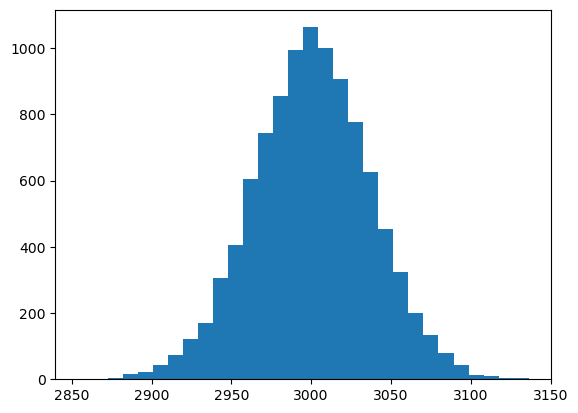

In [23]:
Sn = getSn(1000)
plt.hist(Sn, bins = 30, label='Sn[i]')

In [24]:
def getSnMnZn(n): 
    num_sims = 10_000
    Sn = np.zeros(num_sims)
    Mn = np.zeros(num_sims)
    Zn = np.zeros(num_sims)
    for i in range(num_sims):
        Xseq=  X.rvs(n) 
        Sn[i] =  np.sum(Xseq)
        Mn[i] =  Sn[i]/n
        Zn[i] =  (Sn[i] - n*mu)/(sigma*np.sqrt(n))
    return Sn, Mn, Zn

(array([1.55083559e-03, 7.75417797e-04, 3.10167119e-03, 8.52959576e-03,
        1.58960648e-02, 3.33429653e-02, 4.45865233e-02, 9.03361733e-02,
        1.14374125e-01, 1.84937144e-01, 2.46195150e-01, 2.96985016e-01,
        3.43122375e-01, 3.69098871e-01, 3.96626203e-01, 3.95850785e-01,
        3.52427389e-01, 2.94658763e-01, 2.19055528e-01, 1.73693586e-01,
        1.27168519e-01, 7.09507284e-02, 4.45865233e-02, 2.59764962e-02,
        1.31821025e-02, 5.81563347e-03, 3.10167119e-03, 7.75417797e-04,
        0.00000000e+00, 3.87708898e-04]),
 array([-3.70385445, -3.44592898, -3.18800351, -2.93007804, -2.67215257,
        -2.4142271 , -2.15630163, -1.89837616, -1.64045069, -1.38252522,
        -1.12459975, -0.86667428, -0.60874881, -0.35082334, -0.09289787,
         0.16502761,  0.42295308,  0.68087855,  0.93880402,  1.19672949,
         1.45465496,  1.71258043,  1.9705059 ,  2.22843137,  2.48635684,
         2.74428231,  3.00220778,  3.26013325,  3.51805872,  3.77598419,
         4.03390

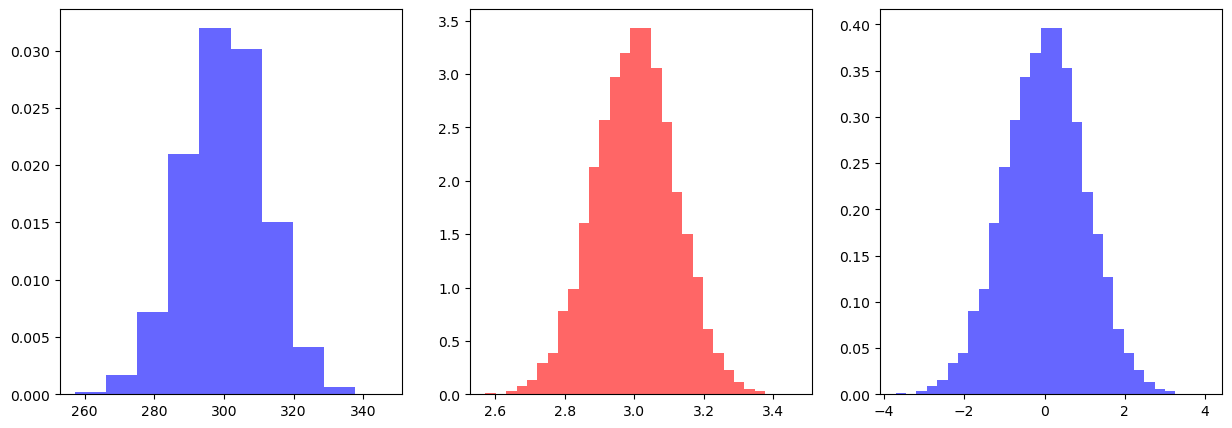

In [25]:
#PLOTING
Sn, Mn, Zn = getSnMnZn(100)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axes[0].hist(Sn, density=True, alpha=0.6, color='blue', label='Sn[i]')
axes[1].hist(Mn, bins=30, density=True, alpha=0.6, color='red', label='Mn[i]')
axes[2].hist(Zn, bins=30, density=True, alpha=0.6, color='blue', label='Zn[i]')


In [26]:
from ipywidgets import interactive

In [27]:
def uplotMn(n):
    _, Mn, _ = getSnMnZn(n)
    plt.hist(Mn, bins=30)
    plt.xlim(-0.1, 6)
    
interactive_plot = interactive(uplotMn, n=100)
interactive_plot

interactive(children=(IntSlider(value=100, description='n', max=300, min=-100), Output()), _dom_classes=('widg…

In [28]:
def uplotSn(n):
    Sn,_, _ = getSnMnZn(n)
    plt.hist(Sn, bins=30)
    plt.xlim(-0.1,2500)
    
interactive_plot = interactive(uplotSn, n=100)
interactive_plot

interactive(children=(IntSlider(value=100, description='n', max=300, min=-100), Output()), _dom_classes=('widg…

In [29]:
def uplotZn(n):
    _,_, Zn = getSnMnZn(n)
    plt.hist(Zn, bins=30)
    plt.xlim(-5,5)
    
interactive_plot = interactive(uplotZn, n=100)
interactive_plot

interactive(children=(IntSlider(value=100, description='n', max=300, min=-100), Output()), _dom_classes=('widg…

## Revisit our problem

A machine process parts, one at a time, in a time independently and uniformly distributed in [1,5]. 
What is the probability the machine processes at least 100 parts in 320 time units? 

## Example: customer support

A call center receives customer calls according to an exponential distribution with a mean wait time of 4 minutes.
Questions:
1. If a single customer calls, what is the probability that they wait more than 5 minutes?
2. If we take a random sample of 40 customers, what is the probability that their average wait time is more than 5 minutes? 

## Polling

$p$: The fraction of population that will vote "yes".

$X_i$: The i-th person's vote 

* What random variable $X_i$ is?

$n$: the number of samples we collect .

$M_n$: The fraction of "Yes" in the sample.

Question: What is the number of samples we need to collect so that 
$P(|M_n- p|\le 0.01)<0.05$

In [ ]:
# FIND THE NUMBER OF SAMPLES.